In [249]:
import numpy as np
import matplotlib.pyplot as plt

# Week-9

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.


## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. 

**Do not edit this cell.**

In [250]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0, class_sep = 3, random_state=20)

flip_y = linearly seperable data
class sep = How much seperation need to be between data points
clusters per class = 1


## Problem 1
How many samples are there in the dataset?



In [251]:
X.shape[0]

50

## Problem 2

How many features are there in the dataset?


In [252]:
X.shape[1]

2

## Problem 3
In the target vector $y$, replace all occurrences of 0 with -1. 

How many unique classes are there in the target vector?



In [253]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0])

In [254]:
y[y == 0] = -1

In [255]:
y

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1])

## Problem 4
Plot the data keepig first feature on the x-axis and the second feature on the y-axis. Plot the data points belonging to each class in different colors. Does the data seem linearly separable?

[MCQ]

**Options:**

(a) Yes

(b) No



In [256]:
X[:,0] # First Feature values

array([ 4.35809465,  2.70007032,  2.92613113,  2.70492468,  1.40403442,
        3.03688252,  2.74256066, -2.53147281, -1.90652352,  3.55224854,
       -2.43721593, -3.82089441, -3.24465415,  4.2121494 , -2.99695052,
       -3.01117738,  3.56210053,  1.19234332, -2.95439198,  1.94746997,
       -3.04821703,  3.09959095, -2.68400642, -2.64798924,  3.77398178,
       -2.02398505,  1.95338326, -3.13696594,  4.13223512,  3.61161689,
       -2.29146275,  2.28603659, -2.43453297,  3.27785771, -3.40755161,
        3.44739526,  2.43697964, -2.76223727, -2.87979009, -2.60693185,
       -2.59736648,  2.3377644 ,  3.47758161, -2.89202149, -2.98141606,
       -2.54812645, -3.30073539,  0.85750064,  3.21773047, -3.15291477])

In [257]:
X[:,1] # Second Feature Values

array([-4.19871954, -2.60830647, -2.17831489, -2.55866532, -3.91361837,
       -2.49014793, -2.92751451, -3.04571493, -3.03365141, -4.02550689,
       -2.99106651, -2.96537062, -2.86970741, -3.5532501 , -3.12043248,
       -2.95287757, -2.37323926, -2.86901581, -2.98535095, -3.32751504,
       -2.95157601, -3.0366794 , -3.06622593, -3.02054159, -3.87848502,
       -3.14576247, -1.29777093, -3.03770104, -2.22613331, -1.54972885,
       -3.06222302, -2.402637  , -3.12676966, -2.26092763, -2.94077325,
       -3.03246223, -2.53407509, -3.10148042, -3.08237552, -3.02044572,
       -2.99673965, -3.68547144, -2.90769394, -3.05059342, -2.91060218,
       -3.03655031, -3.03143928, -3.58817043, -3.32663048, -2.9942445 ])

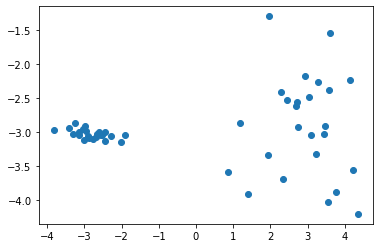

In [258]:
plt.plot(X[:,0] , X[:,1] , 'o')

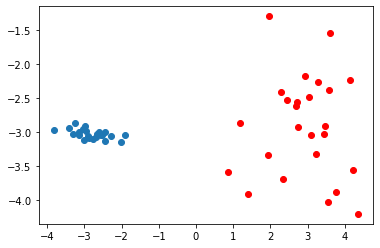

In [259]:
plt.plot(X[:,0][y == -1] , X[:,1][y == -1] , 'o') ## blue color points with label -1
plt.plot(X[:,0][y == 1] , X[:,1][y == 1] , 'ro')  ## red color points with label +1

## so the data is linearly seperable

## Problem 5

Initialize w to be a zero vector, with shape equal to the number of features in the data.

Iterate over each data point $x$ in $X$ one by one (in the same sequence as present in $X$). For each data point, compute the value of $w^Tx$. If $w^Tx \ge 0$, predict positive class for $x$, else predict the negative class.

If prediction does not match the actual class label, update the weight vector as per the following update rule:
$$w_{new} = w_{old} + xy$$ where $x$ is the data point and $y$ is the actual label of $x$.

Run the above for 10 epochs (iterations), but stop if there are no weight updates in an epoch. 

In which iteration, does the number of weight updates becomes zero for the first time?

[NAT]
**Options**

(a) 1

(b) 2

(c) 3

(d) 5



In [260]:
w = np.zeros(2)
w

array([0., 0.])

In [261]:
wt_upd_in_each_epoch = {}
## this is to keep track of each update

for epoch in range(10):
  wt_upd_in_each_epoch[epoch] = 0
  
  ## check w.T @ x for each i if > 0 then 1 else -1 will be my prediction
  for i in range(len(X)):
    y_pred = 1 if w.T@X[i] >= 0 else -1
    ## print(y[i], y_pred)
  
  ## now check actual and predicted labels are same or not | if not same then update the weight vector
    if y[i] == 1 and y_pred == -1:
      w = w + X[i]
      wt_upd_in_each_epoch[epoch] += 1
    if y[i] == -1 and y_pred == 1:
      w = w - X[i]
      wt_upd_in_each_epoch[epoch] += 1

  if wt_upd_in_each_epoch[epoch] == 0:
    break

wt_upd_in_each_epoch


{0: 2, 1: 0}

## Problem 6
Plot the vector w and the decision boundary thus obtained.



(-5.0, 5.0)

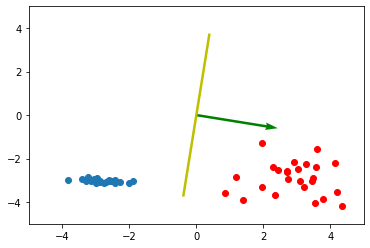

In [262]:
plt.plot(X[:,0][y == -1] , X[:,1][y == -1] , 'o') ## blue color points with label -1
plt.plot(X[:,0][y == 1] , X[:,1][y == 1] , 'ro')  ## red color points with label +1
plt.quiver(0,0,w[0],w[1],scale = 25, color = 'g')
plt.quiver(0,0,-w[1],w[0],scale = 25, color = 'y', headaxislength = 0, headlength = 0)
plt.quiver(0,0,w[1],-w[0],scale = 25, color = 'y', headaxislength = 0, headlength = 0)

plt.xlim(-5,5)
plt.ylim(-5,5)

## Problem 7
What is the value of loss using the weight vector obtained earlier?  


In [263]:
## if there is a mismatch then we add one 

w

array([ 6.08372134, -0.97979197])

In [264]:
loss = 0

for i in range(len(X)):
  y_pred = 1 if w.T@X[i] >= 0 else -1

  if y[i] == 1 and y_pred == -1:
    loss +=1
      
  if y[i] == -1 and y_pred == 1:
    loss +=1

loss

0

## Problem 8
Now use the following data set, replace occurrences of 0 with -1 and visualize.

**Do not edit the following cell.**



In [265]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0.1, class_sep = 2, random_state=20)

## Problem 9

Apply the Perceptron code again. 

What is the number of weight updates performed in epoch 10?



In [266]:
X.shape

(50, 2)

In [267]:
np.unique(y)

array([0, 1])

In [268]:
## Replace the zeros with minus one
y[y == 0] = -1

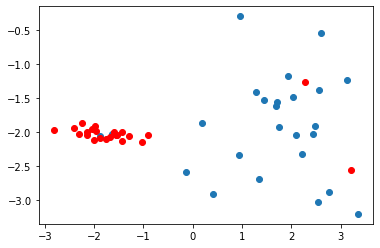

In [269]:
## Visualise the data

plt.plot(X[:,0][y==1],X[:,1][y==1], 'o')
plt.plot(X[:,0][y==-1],X[:,1][y==-1], 'ro')

# from the plot its clearly visible that the data in not linearly seperable for perceptron algorithm

In [270]:
## Performing the perceptron algorithm: 
wt_upd = {}


for epoch in range(10):
  wt_upd[epoch] = 0
  ## check for every point if wTx >=0 then 1 else -1 is my prediction
  for i in range(len(X)):
    y_pred = 1 if w.T@X[i] >= 0 else -1

    ## there can be two types of mistakes:
    if y[i] == 1 and y_pred == -1:
      w = w + X[i]
      wt_upd[epoch] +=1

    if y[i] == -1 and y_pred == 1:
      w = w - X[i]
      wt_upd[epoch] +=1
  if wt_upd[epoch] == 0:
    break
wt_upd

{0: 9, 1: 12, 2: 10, 3: 10, 4: 11, 5: 10, 6: 11, 7: 10, 8: 12, 9: 9}

## Problem 10
Visualize the weight vector and the decision boundary.



(-5.0, 5.0)

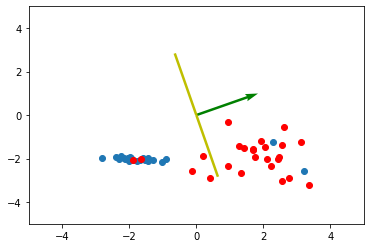

In [271]:
plt.plot(X[:,0][y == -1] , X[:,1][y == -1] , 'o') ## blue color points with label -1
plt.plot(X[:,0][y == 1] , X[:,1][y == 1] , 'ro')  ## red color points with label +1
plt.quiver(0,0,w[0],w[1],scale = 15, color = 'g')
plt.quiver(0,0,-w[1],w[0],scale = 15, color = 'y', headaxislength = 0, headlength = 0)
plt.quiver(0,0,w[1],-w[0],scale = 15, color = 'y', headaxislength = 0, headlength = 0)

plt.xlim(-5,5)
plt.ylim(-5,5)

## Problem 11
What is the value of loss using the weight vector obtained in the 10th epoch?



In [272]:
loss = 0

for i in range(len(X)):
  y_pred = 1 if w.T@X[i] >= 0 else -1

  if y[i] == 1 and y_pred == -1:
    loss +=1
      
  if y[i] == -1 and y_pred == 1:
    loss +=1

loss

7